In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk import bigrams, collocations
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Download required NLTK data (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# -------------------------------------------------------------
# LOAD TEXT DATA FROM PROJECT GUTENBERG
# -------------------------------------------------------------
!wget https://www.gutenberg.org/ebooks/11.txt.utf-8 -O alice.txt

# Open the file and read it into a string
with open("alice.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Optional: Remove Gutenberg header and footer
start = text.find("*** START OF THIS PROJECT GUTENBERG EBOOK")
end = text.find("*** END OF THIS PROJECT GUTENBERG EBOOK")
if start != -1 and end != -1:
    text = text[start:end]

# Preview the first 1000 characters
print(text[:1000])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--2025-10-25 18:52:12--  https://www.gutenberg.org/ebooks/11.txt.utf-8
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.gutenberg.org/cache/epub/11/pg11.txt [following]
--2025-10-25 18:52:12--  http://www.gutenberg.org/cache/epub/11/pg11.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/11/pg11.txt [following]
--2025-10-25 18:52:12--  https://www.gutenberg.org/cache/epub/11/pg11.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174355 (170K) [text/plain]
Saving to: ‘alice.txt’

alice.txt           100%[===================>] 170.27K  --.-KB/s    in 0.1s    

20

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- Add this line
nltk.download('stopwords')

# Tokenize words
tokens = word_tokenize(text.lower())

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
clean_tokens = [t for t in tokens if t.isalpha() and t not in stop_words]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: title={'center': 'Top 20 Words in the Text'}, xlabel='Samples', ylabel='Counts'>

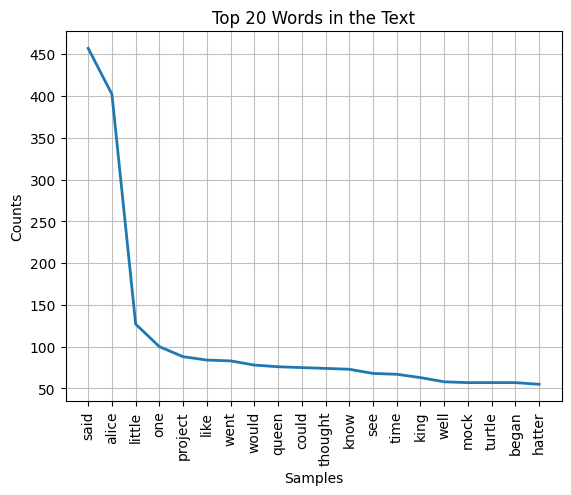

In [22]:
fdist = FreqDist(clean_tokens)
fdist.most_common(10)
fdist.plot(20, cumulative=False, title="Top 20 Words in the Text")


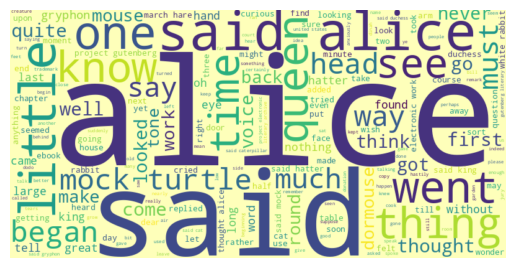

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='#feffba').generate(' '.join(clean_tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
from nltk import bigrams, collocations

bigrams_list = list(bigrams(clean_tokens))
print(bigrams_list[:10])

finder = collocations.BigramCollocationFinder.from_words(clean_tokens)
print(finder.nbest(nltk.collocations.BigramAssocMeasures().pmi, 10))


[('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'alice'), ('alice', 'adventures'), ('adventures', 'wonderland'), ('wonderland', 'ebook'), ('ebook', 'use'), ('use', 'anyone'), ('anyone', 'anywhere'), ('anywhere', 'united')]
[('acceptance', 'elegant'), ('accepting', 'unsolicited'), ('accessed', 'displayed'), ('accounting', 'tastes'), ('accustomed', 'usurpation'), ('act', 'crawling'), ('actual', 'direct'), ('additions', 'deletions'), ('adoption', 'energetic'), ('affair', 'trusts')]


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print(sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.083, 'neu': 0.823, 'pos': 0.094, 'compound': 0.9999}
